In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
df=pd.read_csv("KNNAlgorithmDataset.csv")
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [10]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [16]:
df.drop(columns=["id","Unnamed: 32"],inplace=True)

In [18]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [20]:
df.iloc[:,1].describe()

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64

In [22]:
df.iloc[:,2:6].describe()

,texture_mean,perimeter_mean,area_mean,smoothness_mean
count,569.000000,569.000000,569.000000,569.000000
mean,19.289649,91.969033,654.889104,0.096360
std,4.301036,24.298981,351.914129,0.014064
min,9.710000,43.790000,143.500000,0.052630
25%,16.170000,75.170000,420.300000,0.086370
50%,18.840000,86.240000,551.100000,0.095870
75%,21.800000,104.100000,782.700000,0.105300
max,39.280000,188.500000,2501.000000,0.163400


In [38]:
df.shape

(569, 31)

array([<Axes: title={'center': 'texture_mean'}, xlabel='diagnosis'>,
       <Axes: title={'center': 'perimeter_mean'}, xlabel='diagnosis'>],
      dtype=object)

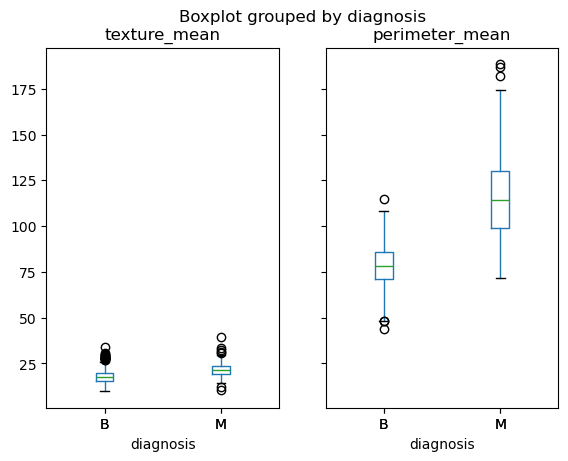

In [24]:
df.boxplot(["texture_mean","perimeter_mean"],by="diagnosis",grid=False)

In [40]:
y=df.iloc[:,0]   #storing string type data seperately
x=df.iloc[:,1:31]

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_x=scaler.fit_transform(x)
scaled_x

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [55]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=0.2,random_state=42)

In [59]:
x_train

array([[0.09692839, 0.25769361, 0.10365559, ..., 0.60137457, 0.52493594,
        0.40968123],
       [0.66775522, 0.57017247, 0.68350494, ..., 0.9975945 , 0.49931007,
        0.48117539],
       [0.10374367, 0.14034494, 0.10648884, ..., 0.174811  , 0.33845851,
        0.19585465],
       ...,
       [0.34592267, 0.2404464 , 0.32140142, ..., 0.11453608, 0.17602996,
        0.04040404],
       [0.33125089, 0.33513696, 0.32706793, ..., 0.62783505, 0.31815494,
        0.33097206],
       [0.24605992, 0.36557322, 0.23101375, ..., 0.25536082, 0.22255076,
        0.090122  ]])

In [61]:
y_train

68     B
181    M
63     B
248    B
60     B
      ..
71     B
106    B
270    B
435    M
102    B
Name: diagnosis, Length: 455, dtype: object

In [63]:
x_test

array([[0.25978513, 0.30064254, 0.25775689, ..., 0.34879725, 0.2856298 ,
        0.2129083 ],
       [0.56599934, 0.39228948, 0.55151683, ..., 0.61477663, 0.19436231,
        0.07116621],
       [0.4012968 , 0.33040243, 0.40017967, ..., 0.52027491, 0.25073921,
        0.1649613 ],
       ...,
       [0.21482323, 0.17653027, 0.207864  , ..., 0.33017182, 0.2166371 ,
        0.1511872 ],
       [0.34260968, 0.61345959, 0.33694976, ..., 0.28243986, 0.06406466,
        0.15033451],
       [0.65071702, 0.72404464, 0.63513233, ..., 0.57010309, 0.25684999,
        0.17801391]])

In [65]:
y_test

204    B
70     M
131    M
431    B
540    B
      ..
486    B
75     M
249    B
238    B
265    M
Name: diagnosis, Length: 114, dtype: object

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [98]:
y_predict=knn.predict(x_test)
print(knn.score(x_test,y_test))

0.9649122807017544


In [104]:
from sklearn.metrics import confusion_matrix

In [106]:
print(confusion_matrix(y_test,y_pred))

[[69  2]
 [ 3 40]]


In [108]:
from sklearn.metrics import classification_report

In [110]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.96      0.97      0.97        71
           M       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

